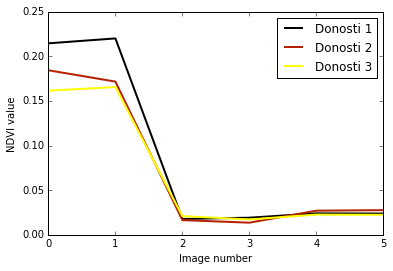

--- 33.5265638828 seconds ---


In [73]:
import ee
import matplotlib.pylab as plt
import numpy as np
import matplotlib.cm as cm
import time

ee.Initialize()
start_time = time.time()
#longitud, latitud, zoom
#ee.mapclient.centerMap(-2.0005, 43.3144, 12)
regiones = ee.FeatureCollection([
    ee.Feature(ee.Geometry.Polygon(
[[[-2.0005, 43.3144],
      [-1.9993, 43.3157],
      [-1.9974, 43.3148],
      [-1.9984, 43.3134]]]),{'name': 'Donosti 1'}),
    
    ee.Feature(ee.Geometry.Polygon(
[[[-1.9968, 43.3146],
      [-1.9971, 43.3131],
      [-1.9946, 43.3131],
      [-1.9946, 43.3143]]]),{'name': 'Donosti 2'}),
               
    ee.Feature(ee.Geometry.Polygon(
[[[-1.9940, 43.3145],
      [-1.9937, 43.3129],
      [-1.9912, 43.3131],
      [-1.9912, 43.3146]]]),{'name': 'Donosti 3'}),
]);
count=regiones.size().getInfo()

regions = [item.get('geometry') for item in regiones.getInfo().get('features')]
labels=[item.get('properties') for item in regiones.getInfo().get('features')]
landsatCollection = ee.ImageCollection('COPERNICUS/S2');
landsatDateCollection = ee.ImageCollection(landsatCollection.filterDate('2017-05-01', '2017-06-01'))
#una foto cada 5 días
val = [None] * count
etiquetas = [None] * count
i=0
for region in regions:
    
    etiquetas[i]=labels[i].get('name')
    landsatAOI = ee.ImageCollection(landsatDateCollection.filterBounds(region))
    images = [item.get('id') for item in landsatAOI.getInfo().get('features')]
    feature = ee.Feature(region)
    values=[]
    for image in images:
        nir = ee.Image(image).reduceRegion(ee.Reducer.mean(), feature.geometry()).getInfo().get('B8')
        red = ee.Image(image).reduceRegion(ee.Reducer.mean(), feature.geometry()).getInfo().get('B4')
        ndvi = ((nir - red)/(nir + red))
        values.append(ndvi)
    val[i]=values
    i+=1

cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, count)]

for i, color in enumerate(colors, start=0):
    plt.plot(val[i],color=color,linewidth=2)
plt.legend( etiquetas, loc = 'upper right')
plt.xlabel('Image number')
plt.ylabel('NDVI value')
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))


